In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
pd.read_excel("/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx")

,Date,Cnsmr,Manuf,HiTec,Hlth,Other
0,190101,-1.34,4.20,3.01,-0.71,1.92
1,190102,2.89,4.87,3.45,3.33,2.63
2,190103,1.89,1.81,-0.83,2.29,-0.86
3,190104,4.36,2.58,3.16,6.37,1.11
4,190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...,...
67,190608,1.71,0.80,4.36,2.85,2.59
68,190609,-3.28,-2.84,-6.16,-6.01,-2.26
69,190610,8.63,6.01,6.74,2.25,7.25
70,190611,0.51,-1.85,0.35,-4.29,-4.96


In [3]:
df_industries = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx', index_col='Date')
df_market = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam–Market.xlsx', index_col='Date')
# df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

# Question

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios:

Calculate and report the risk premium and the standard deviation of (excess) return, for the five industry portfolios and the global minimum-variance portfolio.



In [4]:
stats_df = pd.DataFrame({'Mean': df_industries.mean(), 
                         'Standard Deviation': df_industries.std()})
print("\n risk premium and the standard deviation for five industries:")
pd.DataFrame(stats_df.round(3))


 risk premium and the standard deviation for five industries:


,Mean,Standard Deviation
Cnsmr,1.449,3.115
Manuf,1.109,3.935
HiTec,1.672,3.788
Hlth,1.452,3.601
Other,1.366,4.314


In [5]:
R = df_industries.mean().values
V = df_industries.cov().values
e = np.ones(len(df_industries.columns)).T

alpha = R.T@np.linalg.inv(V)@e
zeta  = R.T@np.linalg.inv(V)@R
delta = e.T@np.linalg.inv(V)@e
R_mv  = alpha/delta     # min variance portfolio
alpha, zeta, delta, R_mv

(0.15784554983954383,
 0.27783526430367983,
 0.11184569276552822,
 1.4112796473123832)

Plot the minimum-variance frontier (without riskless asset) generated by the five industry portfolios, with risk premium on the vertical axis and standard deviation of (excess) return on the horizontal axis. This graph must cover the range from 0% to 3% per month, in increments of 0.1% (or less), on the vertical axis.

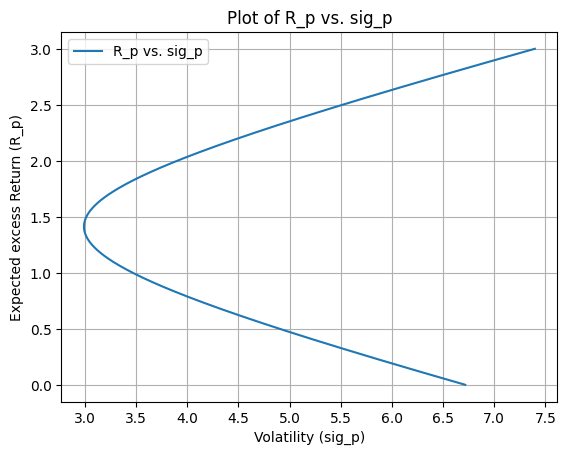

In [6]:
# efficient frontier without riskless asset
R_p = np.arange(0,3,.001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)**.5

plt.plot(sig_p, R_p, label="R_p vs. sig_p")
plt.xlabel("Volatility (sig_p)")  # X-axis label
plt.xticks(np.arange(3, 8, 0.5))
plt.ylabel("Expected excess Return (R_p)")         # Y-axis label
plt.title("Plot of R_p vs. sig_p")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# minimum variance portfolio sigma and return
# left most portfolio
print("global minimum-variance portfolio., sigma and expected return")
np.min(sig_p), R_p[np.argmin(sig_p)]

global minimum-variance portfolio., sigma and expected return


(2.990132287750037, 1.411)

Using a suitable value for the y-intercept, plot the efficient frontier generated by the five industry portfolios with the riskless asset, on the same graph as the minimum-variance frontier.

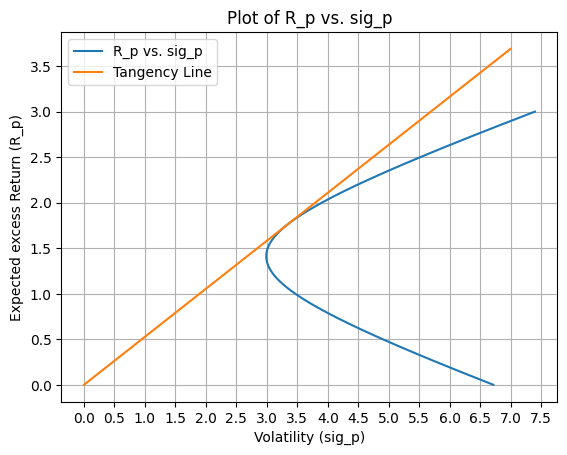

In [8]:
# efficient frontier without riskless asset
R_p = np.arange(0,3,.001)
sig_p = (1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)**.5

R_f = 0
sig_p_mvf = np.arange(0,7,.001)
R_p_mvf = R_f + (zeta-2*alpha*R_f+delta*R_f**2)**.5*sig_p_mvf

plt.plot(sig_p, R_p, label="R_p vs. sig_p")
plt.plot(sig_p_mvf, R_p_mvf, label="Tangency Line")
plt.xlabel("Tracking Error (%)")  # X-axis label
plt.xlabel("Volatility (sig_p)")  # X-axis label
plt.xticks(np.arange(0, 8, 0.5))
plt.ylabel("Expected excess Return (R_p)")         # Y-axis label
plt.title("Plot of R_p vs. sig_p")  # Title of the plot
plt.grid(True)
plt.legend()
plt.show()

Calculate and report the Sharpe ratio and portfolio weights for the "tangency" portfolio where the two frontiers intersect.

In [9]:
R_tg = (alpha*R_f-zeta)/(delta*R_f-alpha)
sig_tg = -(zeta-2*alpha*R_f+delta*R_f**2)**.5/(delta*(R_f-R_mv))
sharpe_ratio = (R_tg-R_f)/sig_tg

print(f"Sharpe Ratio:\t{sharpe_ratio:.4f}")

Sharpe Ratio:	0.5271


In [10]:
w_star = (delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.linalg.inv(V)@R \
         +(zeta-alpha*R_tg)/(zeta*delta-alpha**2)*np.linalg.inv(V)@e
print(f"tangency portfolio weights")
pd.DataFrame(w_star, df_industries.columns,columns=['Weights'])

tangency portfolio weights


,Weights
Cnsmr,0.730240
Manuf,-0.565645
HiTec,0.533391
Hlth,0.285649
Other,0.016365
